In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-8-6b9f1f33e521>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [ ]:
data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
data.describe()

,ID
count,27230.000000
mean,13615.500000
std,7860.768251
min,1.000000
25%,6808.250000
50%,13615.500000
75%,20422.750000
max,27230.000000


<Axes: >

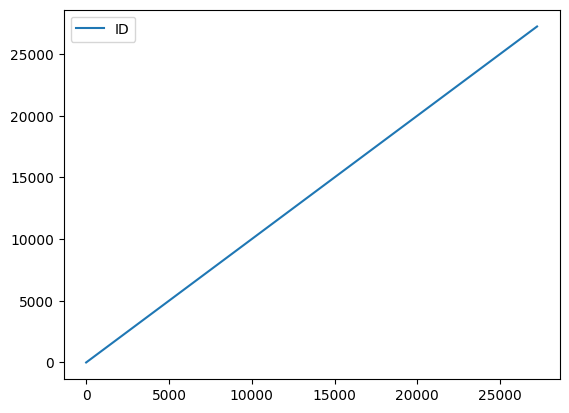

In [ ]:
data.plot()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27230 entries, 0 to 27229
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           27230 non-null  int64 
 1   TITLE        27230 non-null  object
 2   GENRE        27230 non-null  object
 3   DESCRIPTION  27230 non-null  object
dtypes: int64(1), object(3)
memory usage: 851.1+ KB


<ipython-input-17-5c211efea7f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['GENRE'], order=data['GENRE'].value_counts().index, palette='viridis')


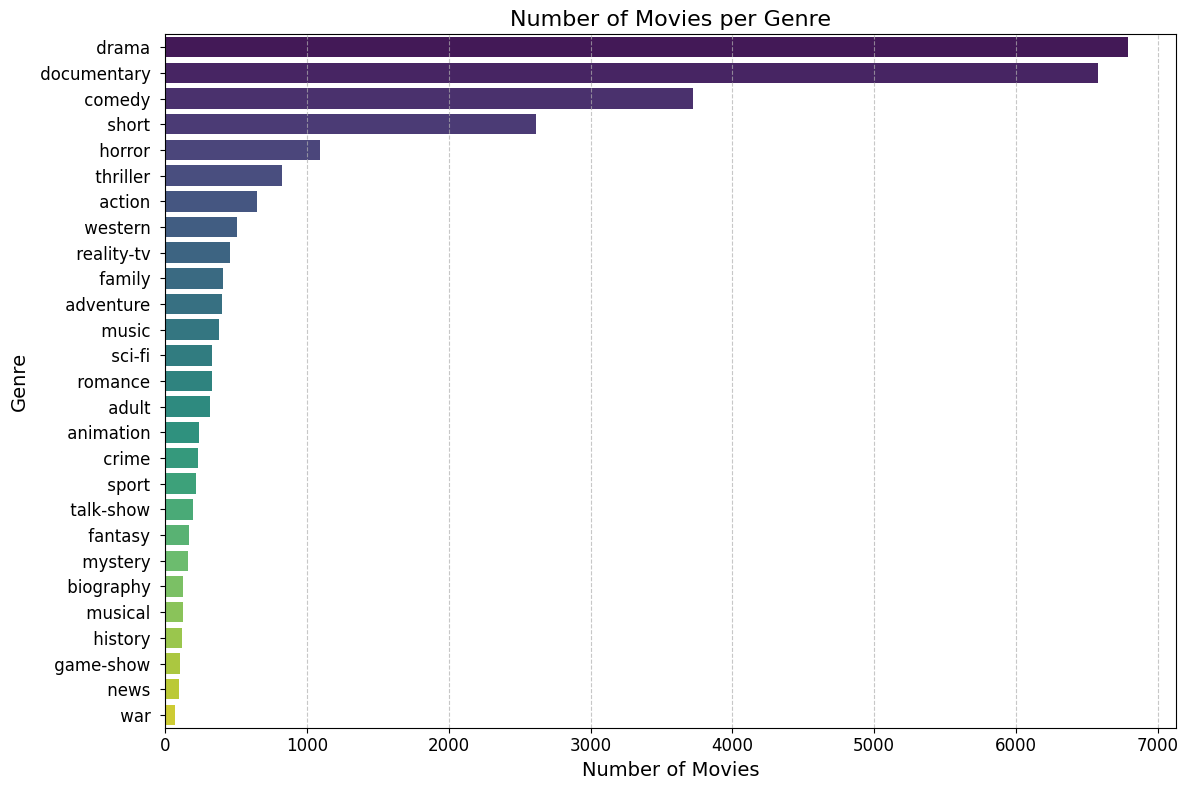

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y=data['GENRE'], order=data['GENRE'].value_counts().index, palette='viridis')
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


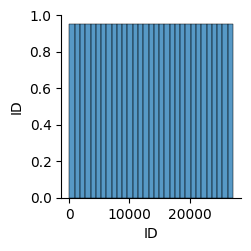

In [ ]:
sns.pairplot(data)

<ipython-input-24-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

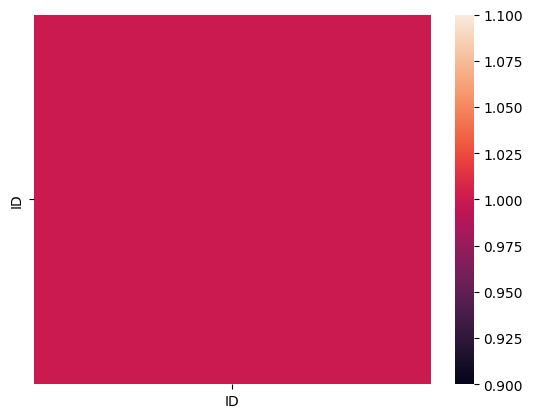

In [ ]:
sns.heatmap(data.corr())

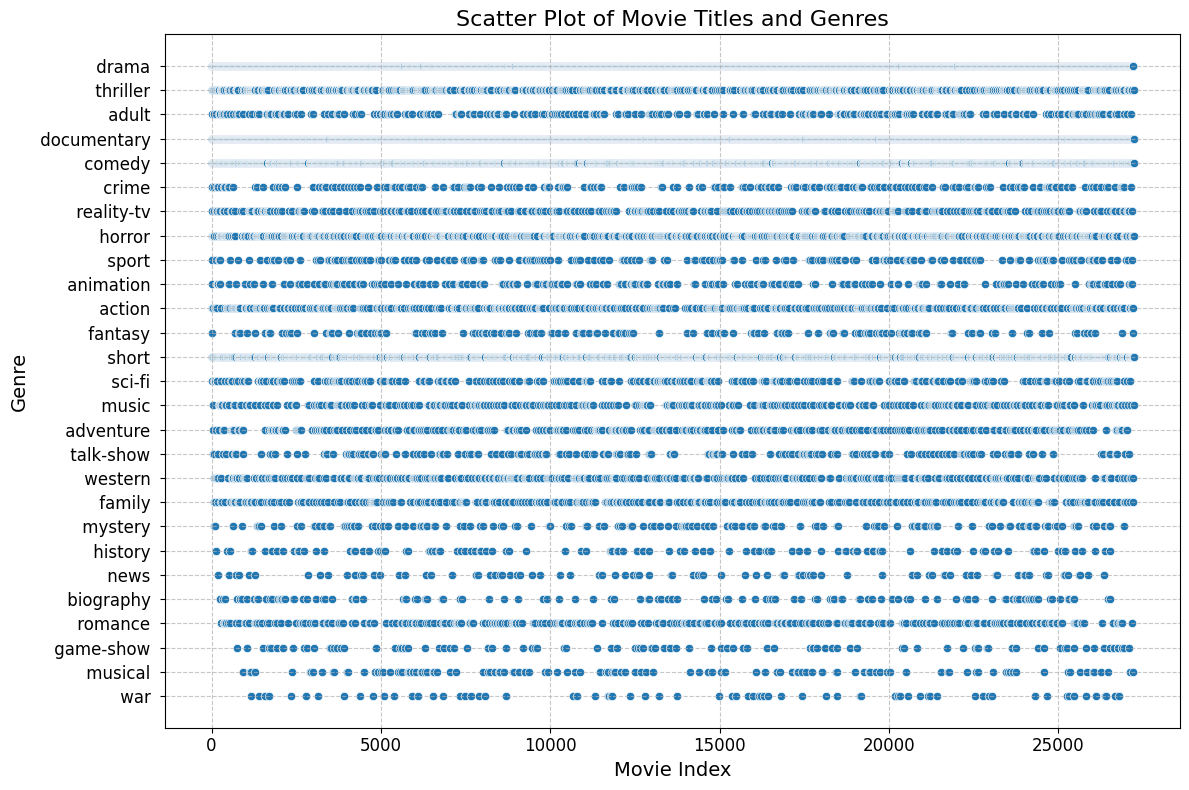

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data.index, y=data['GENRE'], data=data)
plt.title('Scatter Plot of Movie Titles and Genres', fontsize=16)
plt.xlabel('Movie Index', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


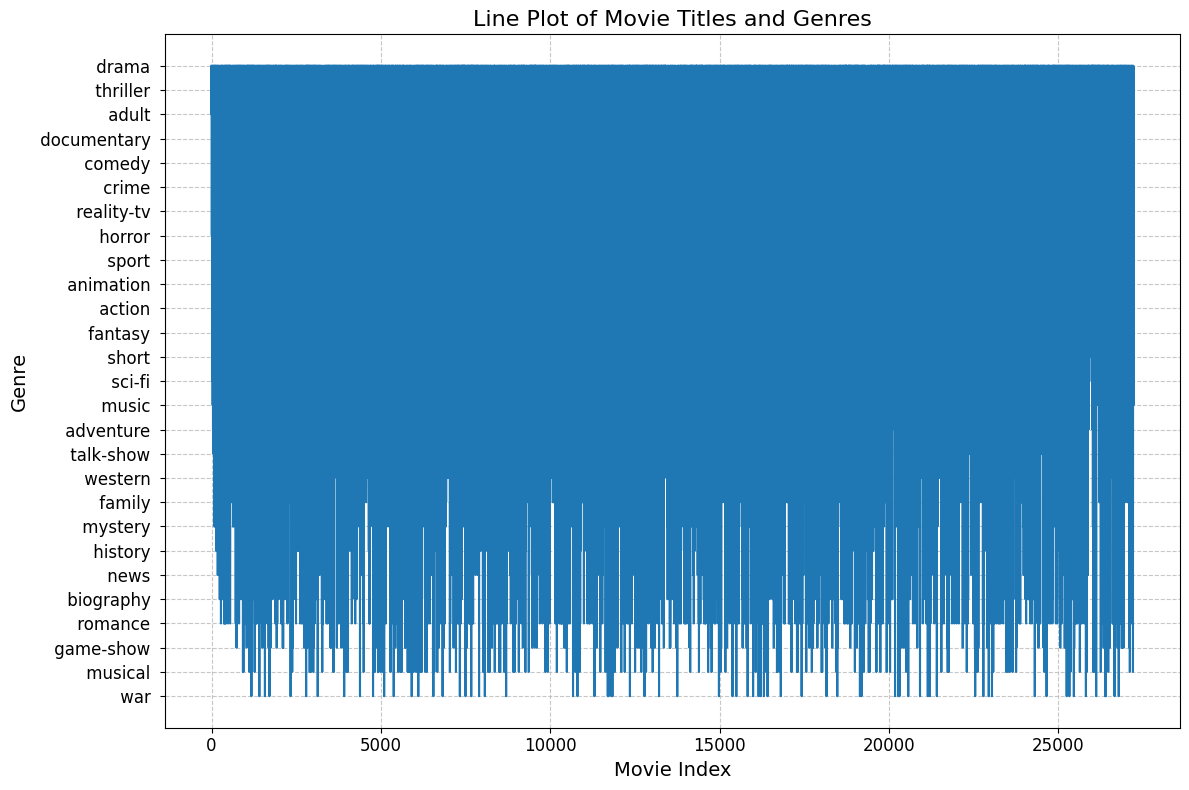

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=data.index, y=data['GENRE'], data=data)
plt.title('Line Plot of Movie Titles and Genres', fontsize=16)
plt.xlabel('Movie Index', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
data['DESCRIPTION'].fillna("", inplace=True)
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(data['DESCRIPTION'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data['GENRE'])


In [ ]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5490268086669114
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.29      0.35       126
           1       0.75      0.34      0.47        71
           2       0.47      0.19      0.27        78
           3       0.73      0.18      0.29        44
           4       0.00      0.00      0.00        25
           5       0.52      0.55      0.53       758
           6       0.20      0.02      0.03        57
           7       0.65      0.81      0.72      1296
           8       0.51      0.69      0.59      1350
           9       0.33      0.10      0.15        90
          10       0.17      0.03      0.05        37
          11       0.78      0.82      0.80        17
          12       0.00      0.00      0.00        20
          13       0.61      0.56      0.59       213
          14       0.66      0.47      0.55        74
          15       0.00      0.00      0.00        19
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()